In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# data read from google drive

#df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/audi.csv")     # dataset for audi
#df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/toyota.csv")   # dataset for toyota
#df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/skoda.csv")    # dataset for skoda
df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/bmw.csv")      # dataset for bmw
#df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/ford.csv")     # dataset for ford
#df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/hyundai.csv")  # dataset for hyundai
#df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/vw.csv")        # dataset for vw


In [83]:
display(df.shape)   # shape of the data row, column
display(df.columns) # column name
display(df.index)   # row index
display(df.head(5))        # first 5 row of dataframe
#df.tail(5)        # last 5 row of data

(10781, 8)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

RangeIndex(start=0, stop=10781, step=1)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


In [84]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


None

In [85]:
# function for each categorical column

def percent_count(data, col):
    col_count = data[col].value_counts(normalize = True)            # number of unique value in normalize
    col_count  = pd.DataFrame(col_count)                            # make a dataframe
    col_count = col_count.reset_index()                             # reset index
    col_count = col_count.rename(columns={"index" : col,
                                              col :  " % of cars"})  # rename columns using dictionary 
    col_count[" % of cars"] = col_count[" % of cars"] * 100          # percentage 
    col_count[" % of cars"] = col_count[" % of cars"].round(2)       # decimal round
    if col =="year": 
      col_count = col_count.sort_values(by = col,ascending= False)    # only year column sort in year wise 
      col_count = col_count[col_count[" % of cars"] > 0.21]           # and did not take all year because of good visualization 
      return col_count
    if col == "model" :
       col_count = col_count[col_count[" % of cars"] > 0.21]          # did not all model value because of good presentation
       return col_count
    else:
      return col_count

In [86]:
model_count = percent_count(df, "model")
year_count = percent_count(df, "year")
transmission_count = percent_count(df, "transmission")
fuelType_count = percent_count(df, "fuelType")
display(fuelType_count)

,fuelType,% of cars
0,Diesel,65.18
1,Petrol,31.69
2,Hybrid,2.76
3,Other,0.33
4,Electric,0.03


In [87]:
# plot all,  using a single function
def bar_plot(data, x_col, y_col, color,yticks, rotation):
    sns.barplot(x = x_col, y = y_col, data = data, color = color) 
    plt.title(" Percentage of cars for each " + x_col)                                  
    plt.yticks(yticks)                                                 
    plt.xticks(rotation = rotation) 

In [88]:
x = input("Enter the car company name")   # give the name of car company

Enter the car company nameBMW


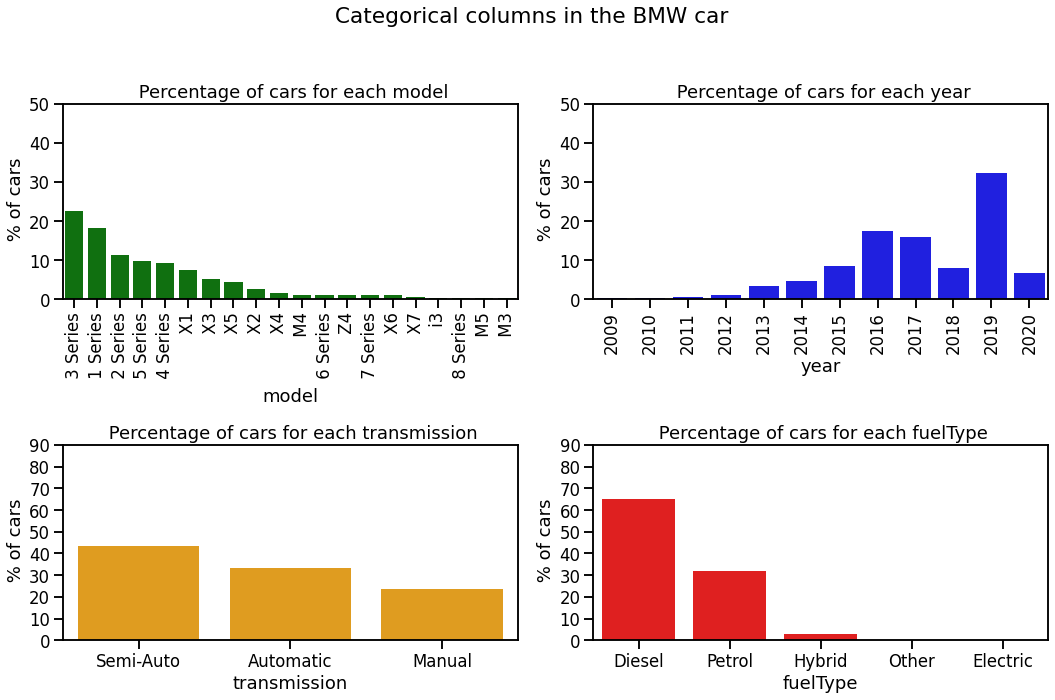

In [89]:
# all four graph in a figure using subplot and function
sns.set_context("talk")                                                         
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)  
bar_plot(model_count,"model", " % of cars","green",np.arange(0,60,10), 90) 
                                                   
plt.subplot(2,2,2)
bar_plot(year_count,"year", " % of cars","blue",np.arange(0,60,10), 90) 
                                                  

plt.subplot(2,2,3)
bar_plot(transmission_count,"transmission", " % of cars", "orange",np.arange(0,100,10), 0) 

plt.subplot(2,2,4)
bar_plot(fuelType_count,"fuelType", " % of cars","red", np.arange(0,100,10), 0) 
plt.suptitle(" Categorical columns in the " + x +" car")   # suptitle name change according to data , here use audi

plt.tight_layout(rect=[0, 0, 1, 0.90])                                                         
plt.show()  